In [91]:
# numpy and plotting
import numpy as np
# import pylab
# import matplotlib.pyplot as plt
import matplotlib.pylab as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
from pathlib import Path
# pyFAI
import pyFAI
# pygix
import pygix
import fabio
import pandas as pd
from pathlib import Path
np.seterr(divide = 'ignore') 
from PIL import Image
# %matplotlib widget

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [92]:
# directory = Path("D:\\OneDrive - UCB-O365\\Rogerslab3\\Teddy\\TPP Films\\BTB-TPP\\2024 Film Growth\\Film 1\\GIWAXS TT5-06")
directory = Path("C:\\Users\\Teddy\\OneDrive - UCB-O365\\Rogerslab3\\Teddy\\TPP Films\\BTB-TPP\\2024 Film Growth\\Film 1\\GIWAXS TT5-06")
stitch_cols = 3
stitch_rows = 2
for sc in range(1, stitch_cols + 1):
    for sr in range(1, stitch_rows + 1):
        file = directory / f"1_{sc}_{sr}"
        print(file)

C:\Users\Teddy\OneDrive - UCB-O365\Rogerslab3\Teddy\TPP Films\BTB-TPP\2024 Film Growth\Film 1\GIWAXS TT5-06\1_1_1
C:\Users\Teddy\OneDrive - UCB-O365\Rogerslab3\Teddy\TPP Films\BTB-TPP\2024 Film Growth\Film 1\GIWAXS TT5-06\1_1_2
C:\Users\Teddy\OneDrive - UCB-O365\Rogerslab3\Teddy\TPP Films\BTB-TPP\2024 Film Growth\Film 1\GIWAXS TT5-06\1_2_1
C:\Users\Teddy\OneDrive - UCB-O365\Rogerslab3\Teddy\TPP Films\BTB-TPP\2024 Film Growth\Film 1\GIWAXS TT5-06\1_2_2
C:\Users\Teddy\OneDrive - UCB-O365\Rogerslab3\Teddy\TPP Films\BTB-TPP\2024 Film Growth\Film 1\GIWAXS TT5-06\1_3_1
C:\Users\Teddy\OneDrive - UCB-O365\Rogerslab3\Teddy\TPP Films\BTB-TPP\2024 Film Growth\Film 1\GIWAXS TT5-06\1_3_2


<class 'numpy.ndarray'>
0
109


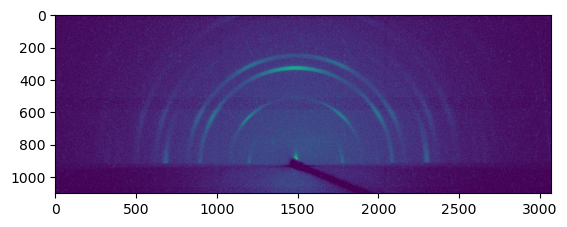

In [93]:
### Load the image data from the tiff. This notebook will need to be in the same folder as the tiff and .poni file
directory = Path("C:\\Users\\Teddy\\OneDrive - UCB-O365\\Rogerslab3\\Teddy\\TPP Films\\BTB-TPP\\2024 Film Growth\\Film 1\\GIWAXS TT5-06")
# directory = Path("D:\\OneDrive - UCB-O365\\Rogerslab3\\Teddy\\TPP Films\\BTB-TPP\\2024 Film Growth\\Film 1\\GIWAXS TT5-06")
filename = "GIWAXS-30min-BTBaTPP-teddy-20240130"
data = fabio.open(directory / (filename + ".tif")).data
print(type(data))

"""pylab.close('all')

fig=pylab.figure(); gs = gridspec.GridSpec(1, 1); ax1 = plt.subplot(gs[0,0])
for ax in fig.get_axes():
    ax.tick_params(which='both', color='k'); #ax.set_facecolor(LBLU)
ax1.set_xlabel("x-pixel (#)"); ax1.set_ylabel("y-pixel (#)"); ax1.yaxis.set_ticks_position('both'); ax1.xaxis.set_ticks_position('both');# ax1.set_facecolor(LBLU)

ax1.imshow(np.log(data), vmin=1, vmax=8, origin='lower')"""

# remove -1 from data. fabio imports data as uint32, so -1 is 2^32-1
data[np.where(data == (1 << 32) - 1)] = 0

plt.imshow(np.log(data+1))
print(np.min(data))
print(np.max(data))


In [94]:
### Load the poni file that the extraction code wrote from the .rasx file. This is used to correct the data.
pg = pygix.Transform()
pg.load(directory / "cal.poni")
### Load the poni file that the extraction code wrote from the .rasx file

Detector Detector	 PixelSize= 7.500e-05, 7.500e-05 m	 TopLeft (1)
Wavelength= 1.541850e-10 m
SampleDetDist= 1.390234e-01 m	PONI= 1.281487e-02, 1.184019e-01 m	rot1=0.000000  rot2=0.000000  rot3=0.000000 rad
DirectBeamDist= 139.023 mm	Center: x=1578.692, y=170.865 pix	Tilt= 0.000° tiltPlanRotation= 0.000° 𝛌= 1.542Å

Detector Detector	 PixelSize= 7.500e-05, 7.500e-05 m	 TopLeft (1)
Wavelength= 1.541850e-10 m
SampleDetDist= 1.390234e-01 m	PONI= 1.281487e-02, 1.184019e-01 m	rot1=1.570796  rot2=0.785398  rot3=0.785398 rad
DirectBeamDist= 3210865786578818048.000 mm	Center: x=-30272332948930134016.000, y=30272332948930134016.000 pix	Tilt= 90.000° tiltPlanRotation= 135.000° 𝛌= 1.542Å

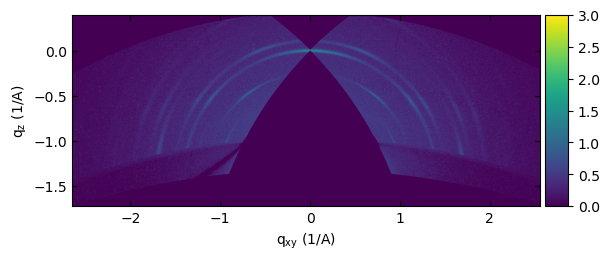

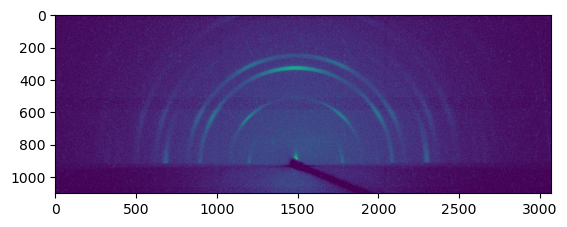

In [110]:
pg.sample_orientation = 1    # 1 is horizontal, 2 is vertical, 3 is 1*180 deg, 4 is 2*180 deg
pg.incident_angle = 45.   # beam to sample angle
pg.tilt_angle = 0.      # azimuthal sample tilt
pg.rot1 = 0.1 * np.pi
pg.rot2 = 0
pg.rot3 = 0
pg # optionally print geometry

### Transform the data using the grazing incidence correction
ii_2d, qxy_2d, qz_2d = pg.transform_reciprocal(data, mask=None, method = 'bbox')

fig = plt.figure(facecolor="w")

gs = gridspec.GridSpec(1, 1)
ax1 = plt.subplot(gs[0, 0])
for ax in fig.get_axes():
    ax.tick_params(which='both', color='k', direction = 'in')
    ax.set_facecolor("b")
ax1.set_xlabel("q$_\mathregular{xy}$ (1/A)")
ax1.set_ylabel("q$_\mathregular{z}$ (1/A)")
ax1.yaxis.set_ticks_position('both'); ax1.xaxis.set_ticks_position('both')
pos = ax1.imshow(np.log10(ii_2d + 1),
           extent=(np.min(qxy_2d)/10, np.max(qxy_2d)/10, -np.max(qz_2d)/10, -np.min(qz_2d)/10),
           vmin = 0, vmax = 3)
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)

fig.colorbar(pos, cax=cax)
plt.figure()
plt.imshow(np.log(data+1))


def save_tiff(filename, image_array):
    im = Image.fromarray(image_array)
    im.save(filename)

#save_tiff(directory / (filename + "_transform.tif"), )


In [97]:
import itertools

for x, y, z in itertools.product(range(3), range(3), range(3)):
    print(x, y, z)

0 0 0
0 0 1
0 0 2
0 1 0
0 1 1
0 1 2
0 2 0
0 2 1
0 2 2
1 0 0
1 0 1
1 0 2
1 1 0
1 1 1
1 1 2
1 2 0
1 2 1
1 2 2
2 0 0
2 0 1
2 0 2
2 1 0
2 1 1
2 1 2
2 2 0
2 2 1
2 2 2
